# FIT5202: Data processing for big data

## Assignment 2B: Real-time stream processing on big data

### Task 2: Kafka Consumer

In [1]:
# import statements
from kafka import KafkaConsumer
import datetime
from time import sleep
import matplotlib
import matplotlib.pyplot as plt
from json import loads
import pandas as pd

# for inline display of plots
%matplotlib notebooK

<IPython.core.display.Javascript object>


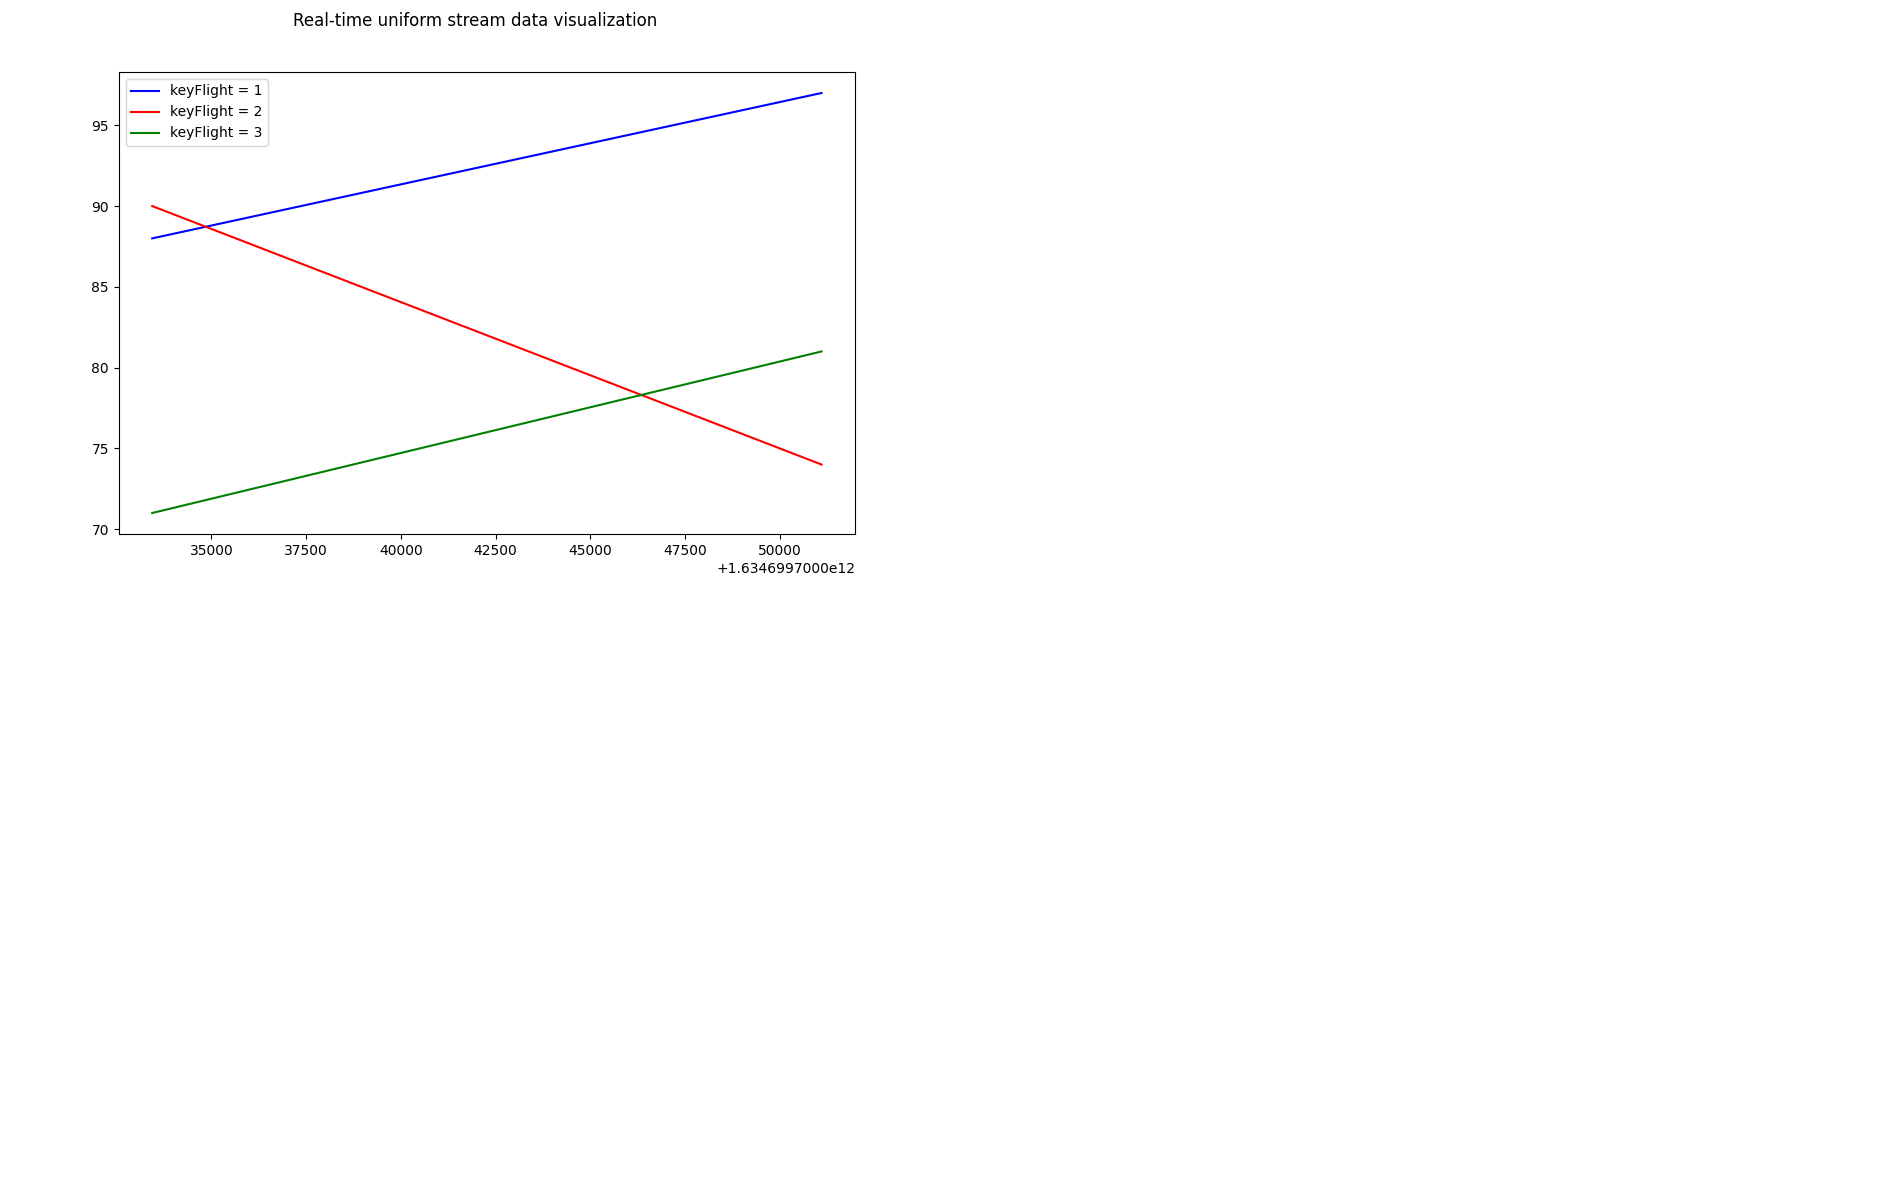

KeyboardInterrupt: 

In [2]:
topic = 'flightTopic'

#consumer connection the published data
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=20000, #stop if no msg after 20 seconds
                                   auto_offset_reset='earliest', #consume earliest available msg
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

#intialise the plot
def init_plots():
    try:
        width = 9.5
        height = 6
        #create figure
        fig = plt.figure(figsize=(width,height)) 
        #subplot axis
        ax = fig.add_subplot(111) 
        #title
        fig.suptitle('Real-time uniform stream data visualization') 
        ax.set_xlabel('Time')
        ax.set_ylabel('Count')

        #display figure
        fig.show() 
        #create canvas
        fig.canvas.draw() 
        return fig, ax
    except Exception as ex:
        print(str(ex))

#Manipulate the consumed data
def consume_messages(consumer, fig, ax):
    try:
        
        #containers
        x_label = [] #x label for time stamp
        list_key_1 = [] #y label for key = 1
        list_key_2 = [] #y label for key = 2
        list_key_3 = [] #y label for key = 3

        #for each message consumed
        for message in consumer:
            sleep(1)
            #extract data
            data = eval(message.value.decode('utf-8'))
            #extract timestamp
            timeReceived = message.timestamp 
            
            count_1 = 0 #flightRecord count for key = 1
            count_2 = 0 #flightRecord count for key = 2
            count_3 = 0 #flightRecord count for key = 3
            
            #for each data point
            for i in range(0,len(data.get("data"))):
                if(data.get("data")[i].get("DAY_OF_WEEK") == 1):
                    count_1 = count_1 + 1
                if(data.get("data")[i].get("DAY_OF_WEEK") == 2):
                    count_2 = count_2 + 1
                if(data.get("data")[i].get("DAY_OF_WEEK") == 3):
                    count_3 = count_3 + 1

            
            x_label.append(timeReceived) #set value for x label
    
            list_key_1.append(count_1) #set y label for key = 1
            list_key_2.append(count_2) #set y label for key = 2
            list_key_3.append(count_3) #set y label for key = 3
            
            ax.plot(x_label, list_key_1,color='b',label="keyFlight = 1") #sub plot for key = 1
            ax.plot(x_label, list_key_2,color='r',label="keyFlight = 2") #sub plot for key = 2
            ax.plot(x_label, list_key_3,color='g',label="keyFlight = 3") #sub plot for key = 3
            
            ax.legend() # show the legend on plot
            fig.canvas.draw() # draw the canvas
            ax.clear() 
            
            #show data for last two minutes
            while(x_label[len(x_label) - 1] - x_label[0] >= 120): #check time difference if greater than 2 mins remove data points
                x_label.pop(0)
                list_key_1.pop(0)
                list_key_2.pop(0)
                list_key_3.pop(0)
         
    except Exception as ex:
            print(str(ex))
            
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)  